In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_key_words.csv')

In [3]:
rootdir = 'data/papers'
contents = []
i = 0
source = []
errors = []
year = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'txt' in file:
            i += 1
            path = os.path.join(subdir, file)
            with open(path) as file:
                year.append(int(path.split('/')[-1][6:10]))
                try:
                    text = file.read()
                    if len(text)> 10 :
                        contents.append(text)
                    source.append(subdir[len(rootdir):])
                except:
                    name, message, content = sys.exc_info()
                    errors.append(message)


In [4]:
beg_ind = contents[0].find('Keywords')
contents[0][beg_ind:contents[0].find('\r', beg_ind )]

'Keywords: community science, citizen science, apprenticeship learning, informal learning'

In [5]:
titles = [content[:content.find('\r')] for content in contents ]

In [6]:
df = df.merge(pd.DataFrame(titles),right_index= True, left_index=True)
df.rename(columns ={0 : 'titles'},inplace = True)

In [7]:
df.head()

,Unnamed: 0,key_words_rak,key_words_tf_idf,titles
0,0,",data included detailed observation notes,late...",",community,lab,scientists,genetics,participati...",Learning Scientific Practices Through Particip...
1,1,",designing robot bodies class session,particip...",",engineering design,engineering,macro,codes,vi...",Visualizing Complex Classrooms Through Real Ti...
2,2,NaN,",algebra,fractions,knowledge,th,year,grade,mea...",Opening the Door to Algebra: The Role of Fract...
3,3,",methodologically rigorous psychometric scale,...",",maker,constructs,dimension,construct,identifi...",Measuring Maker Mindset: Establishing Content ...
4,4,",final high school qualification grade,final m...",",script,argumentation,mathematical,skills,coll...",Fostering University Freshmen’s Mathematical A...


In [8]:
df['keywords_intext'] = ''

In [9]:
tmp_content = []
tmp_years = []
for i,text_ in enumerate(contents):
    
    selection = text_[:text_.find('\r\rReferences\r')]
    if '...............................' in selection :
        continue
    tmp_years.append(year[i])
    tmp_content.append(selection)

In [10]:
df['year'] = 0
for i,text in enumerate(tmp_content): 
    beg_ind = text.find('Keywords')
    if beg_ind != -1: 
        df['keywords_intext'][i] = text[beg_ind+10:text.find('\r', beg_ind)]
    else : 
        df['keywords_intext'][i] = ''
    df['year'][i] = tmp_years[i] 
    

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [12]:
df['key_words_rak'] = df['key_words_rak'].apply(lambda x: x[1:] if type(x) == type('') else x)
df['key_words_tf_idf'] = df['key_words_tf_idf'].apply(lambda x: x[1:] if type(x) == type('') else x)

In [13]:
df.head()

,key_words_rak,key_words_tf_idf,titles,keywords_intext,year
0,"data included detailed observation notes,latec...","community,lab,scientists,genetics,participatio...",Learning Scientific Practices Through Particip...,"community science, citizen science, apprentice...",2018
1,"designing robot bodies class session,participa...","engineering design,engineering,macro,codes,vid...",Visualizing Complex Classrooms Through Real Ti...,"visualization, video analysis, engineering des...",2018
2,NaN,"algebra,fractions,knowledge,th,year,grade,meas...",Opening the Door to Algebra: The Role of Fract...,,2018
3,"methodologically rigorous psychometric scale,o...","maker,constructs,dimension,construct,identifie...",Measuring Maker Mindset: Establishing Content ...,,2018
4,"final high school qualification grade,final ma...","script,argumentation,mathematical,skills,colla...",Fostering University Freshmen’s Mathematical A...,"mathematics, argumentation, collaboration scripts",2016


In [14]:
df['key_words_rak'][0]

'data included detailed observation notes,latecareer/retired community scientists frequently identified,maintaining rigorous protocol standards,daily maintenance tasks related,novice community scientists learn,collecting rigorous data,early/mid career community scientists,study related lab tasks,demographic survey results,complete rote tasks,existing institutional systems,scientific skill requisite,partitioned community scientists,consented community scientists,participating community scientists'

In [15]:
df['key_words_tf_idf'][0]

'community,lab,scientists,genetics,participation,museum,career,scientific,scientific practices,tasks,embedded,practices,institutional,skills,mid'

In [16]:
df['keywords_intext'][0]

'community science, citizen science, apprenticeship learning, informal learning'

In [17]:
print(df['key_words_rak'][1])
print('\n')
print(df['key_words_tf_idf'][1])
print('\n')
print(df['keywords_intext'][1])

designing robot bodies class session,participants included ten eighth graders,time observational coding tool called,cordtra diagrams provided visual representations,collaborative data analysis sessions informed,generalized observation reporting protocol,helping learners make connections,50 minute daily class sessions,quickly generate cordtra diagragms,empirical social sciences research,develop engineering design practices,iterative video analysis—moving,collaborative engineering design practices,engineering design codes occurring,time coding tool provide


engineering design,engineering,macro,codes,video,diagrams,design,practices,real time,figure,coding,minute,video data,time,activities


visualization, video analysis, engineering design, human-centered robotics


In [18]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
dict_stemming = dict()

def final_key_words(l1,l2,l3): 
    l1 = l1.split(',')
    l2 = l2.split(',')
    l3 = l3.split(',')
  
    l = set()
   
    intersection = (set(l1) & set(l2)).union(set(l2) & set(l3)).union(set(l1) & set(l3))
    if  len(intersection) !=0:
        for elem in intersection.union(set(l1)):
            try:
                if elem not in {',',' ',''}:
                    if elem[0] == ' ':
                        elem = elem[1:]
                    dict_stemming[str(st.stem(str(stemmer.stem(elem))))]= elem
                    l.add(str(st.stem(str(stemmer.stem(elem)))))
            except UnicodeDecodeError:
                print(elem)
    if len(intersection) < 3: 
        for elem in l2: 
            if elem[0] == ' ': 
                #print('aziza2')
                elem = elem[1:]
            if elem not in {',',' ',''}: 
                dict_stemming[str(st.stem(str(stemmer.stem(elem))))]= elem
                l.add(str(st.stem(str(stemmer.stem(elem)))))
    return l
    

In [19]:
def split_list(l):
    if type (l) == type(''):
        one = l.split(',')
        two = list((map(lambda x: x.split(), one)))
        return  ','.join([item for sublist in two for item in sublist])
    else :
        return ''

    

In [20]:
final_key_words(df['keywords_intext'][0],df['key_words_tf_idf'][0],split_list(df['key_words_rak'][0]))

{'apprenticeship learn',
 'car',
 'citizen sci',
 'communit',
 'community sci',
 'informal learn',
 'institut',
 'lab',
 'sci',
 'task'}

In [21]:
final_key_w = df.apply(lambda x : final_key_words(x.keywords_intext,x.key_words_tf_idf,split_list(x.key_words_rak)),axis = 1)

students’ solutions


In [22]:
df = df.merge(pd.DataFrame(final_key_w,columns= {'final_keywords'} ), left_index=True, right_index=True)

In [77]:
df.to_csv('keywords_final.csv')

In [78]:
df.head()

,key_words_rak,key_words_tf_idf,titles,keywords_intext,year,final_keywords
0,"data included detailed observation notes,latec...","community,lab,scientists,genetics,participatio...",Learning Scientific Practices Through Particip...,"community science, citizen science, apprentice...",2018,"{communit, task, institut, citizen sci, appren..."
1,"designing robot bodies class session,participa...","engineering design,engineering,macro,codes,vid...",Visualizing Complex Classrooms Through Real Ti...,"visualization, video analysis, engineering des...",2018,"{human-centered robot, tim, engin, video analy..."
2,NaN,"algebra,fractions,knowledge,th,year,grade,meas...",Opening the Door to Algebra: The Role of Fract...,,2018,"{meas, cruc, numb, item, perform, mathem, know..."
3,"methodologically rigorous psychometric scale,o...","maker,constructs,dimension,construct,identifie...",Measuring Maker Mindset: Establishing Content ...,,2018,"{dim, scal, ory, repr, construct, mak}"
4,"final high school qualification grade,final ma...","script,argumentation,mathematical,skills,colla...",Fostering University Freshmen’s Mathematical A...,"mathematics, argumentation, collaboration scripts",2016,"{script, mathem, collaboration script, argu, c..."


In [76]:
print('Number of documents with no Keywords is of {} '. format(len(df['keywords_intext'][df['keywords_intext']== ''])))

Number of documents with no Keywords is of 492 


In [24]:
counter = df.apply(lambda x : [(x.year,elem) for elem in x.final_keywords],axis = 1)


In [25]:
from collections import Counter

dict_of_counts = Counter([item for sublist in counter.values for item in sublist])

In [26]:
import operator

sorted_x = sorted(dict_of_counts.items(), key=operator.itemgetter(1),reverse = True)


In [27]:
d = pd.DataFrame([item for sublist in counter.values for item in sublist],columns = ['year','word'])
 

In [28]:
d['count'] = 1

In [29]:
d.groupby(['year','word']).count()

count
year word                                                     
2015 abl                                                     3
     academ                                                  1
     access                                                  2
     accurac                                                 1
     act                                                    17
     active learn                                            1
     active learning; peer instruction; design-based...      1
     ad                                                      1
     adapt                                                   2
     adaptive teach                                          2
     adv                                                     2
     affect                                                  2
     ag                                                      3
     algebr                                                  3
     align                                                   2
     am                                                      1
     amir                                                    2
     analyt                                                  2
     answ                                                    3
     ap                                                      2
     appl                                                    3
     approach                                                2
     architectures for learn                                 1
     argu                                                    7
     artic                                                   1
     artifact                                                2
     ask                                                     1
     aspect                                                  1
     ass                                                     1
     assess                                                  8
...                                                        ...
2018 way                                                     4
     web                                                     4
     web 2.0                                                 1
     web2.0                                                  1
     week                                                   12
     week week                                               2
     weng                                                    1
     whit                                                    4
     whol                                                    2
     whole class                                             3
     wik                                                     3
     wilensk                                                 5
     window                                                  3
     wis                                                     3
     within                                                  4
     wom                                                     8
     word                                                    6
     work                                                    4
     workshop                                               10
     world                                                   6
     writ                                                   14
     wrong                                                   1
     ye                                                      3
     yeah                                                    2
     year                                                   12
     you                                                    19
     young                                                   4
     young peopl                                             2
     youth pathway                                           1
     zhang                                                   1

[3482 rows x 1 columns]

In [30]:
count_df = pd.DataFrame(sorted_x, columns = ['tuple','count_'])
count_df['year'] = count_df['tuple'].apply(lambda x : str(x).replace('(','').replace(')','').split(',')[0])

In [31]:
count_df['word'] = count_df['tuple'].apply(lambda x : str(x).replace('(','').replace(')','').split(',')[1])

In [32]:
count_df.head()

,tuple,count_,year,word
0,"(2018, teach)",89,2018,'teach'
1,"(2018, sci)",78,2018,'sci'
2,"(2018, design)",62,2018,'design'
3,"(2018, act)",58,2018,'act'
4,"(2018, group)",55,2018,'group'


In [33]:
dict_count = dict(zip(df.groupby(by = 'year').count().index,list(df.groupby(by = 'year').count()['key_words_rak'] )))

In [34]:
from __future__ import division


In [35]:
count_df['percentage'] = count_df.apply(lambda x : x.count_/dict_count[int(x.year)]*100,axis = 1)

In [36]:
import seaborn as sns

In [37]:
tmp = pd.DataFrame(count_df.groupby('year').apply(lambda x : x.percentage.sort_values(ascending = False)[:20]))

In [38]:
tmp.reset_index(inplace = True)

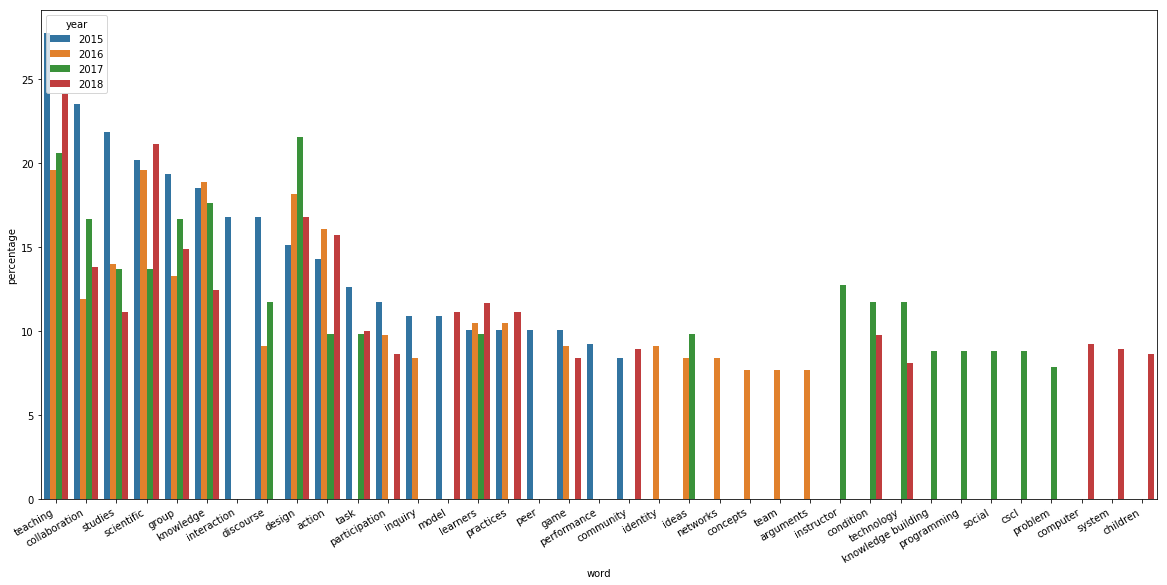

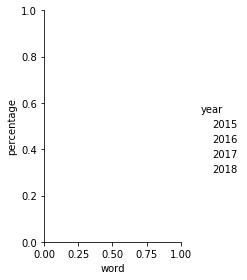

In [81]:
fig,ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)

sns.catplot(x="word", y="percentage",hue="year",
                data=count_df.iloc[tmp.level_1.values], kind="bar",
                height=4, aspect=.7,ax = ax)

# figure size in inches
fig.autofmt_xdate()


In [40]:
words_2015 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2015')['word'])

In [41]:
words_2018 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2018')['word'])

In [42]:
words_2017 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2017')['word'])

In [43]:
words_2016 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2016')['word'])

In [44]:
words2015_ = words_2015-words_2018-words_2016-words_2017

In [45]:
words2016_ = words_2016-words_2015-words_2018-words_2017

In [46]:
words2017_ = words_2017-words_2015-words_2018-words_2016

In [47]:
words2018_ = words_2018-words_2015-words_2016-words_2017

In [48]:
count_df.iloc[0]['word']

" 'teach'"

In [49]:
def percentage(year,words):
    percentage_dict = dict()
    for i,elem in count_df[count_df['percentage']>5].groupby('year').get_group(str(year)).iterrows():
        for elem in words:
            if count_df.iloc[i]['word'] == elem:
                percentage_dict[elem] = count_df.iloc[i]['percentage']
    dataframe = pd.DataFrame.from_dict(percentage_dict,orient='index',columns = {'percentage'})
    dataframe['year'] = year
    return dataframe

In [50]:
final_df = percentage(2015,words2015_).append(percentage(2016,words2016_)).append(percentage(2017,words2017_)).append(percentage(2018,words2018_))

In [51]:
final_df.reset_index(inplace = True)
final_df.rename(columns = {'index':'word'},inplace = True)

In [52]:
dict_stemming

{'four': 'four',
 'database search': 'database search',
 'dist': 'distance',
 'educ': 'education',
 'aug': 'augmented',
 'analytic approach': 'analytic approaches',
 'automated cod': 'automated coding',
 'concret': 'concrete',
 'spee': 'speed',
 'spec': 'species',
 'digit': 'digital',
 'tool design': 'tool design',
 'rel': 'relations',
 'voic': 'voices',
 'affect': 'affective',
 'quantit': 'quantitative',
 'look': 'looking',
 'school': 'school',
 'scholar': 'scholars',
 'curricul': 'curriculum',
 'math': 'math',
 'preference awar': 'preference awareness',
 'connected learn': 'connected learning',
 'direct': 'direction',
 'consequ': 'consequently',
 'second': 'seconds',
 'entr': 'entries',
 'chen': 'chen',
 'neg': 'negative',
 'curriculum materi': 'curriculum materials',
 'nee': 'need',
 'transcrib': 'transcript',
 'nev': 'never',
 'new': 'new',
 'med': 'medium',
 'intellectu': 'intellectual',
 'met': 'meta',
 'studio': 'studio',
 'cult': 'cultural',
 'path': 'path',
 'interpret': 'inte

In [53]:
final_df['word'] = final_df['word'].apply(lambda x : dict_stemming[x[x.find("'")+1:x.find("'",2)]])

In [58]:
final_df.head()

,word,percentage,year
0,unit,5.882353,2015
1,feedback,6.722689,2015
2,qualitative,5.882353,2015
3,sd,6.722689,2015
4,tests,5.882353,2015


In [ ]:
final_df['word'][0][final_df['word'][0].find("'",0):final_df['word'][0].find("'",2)]

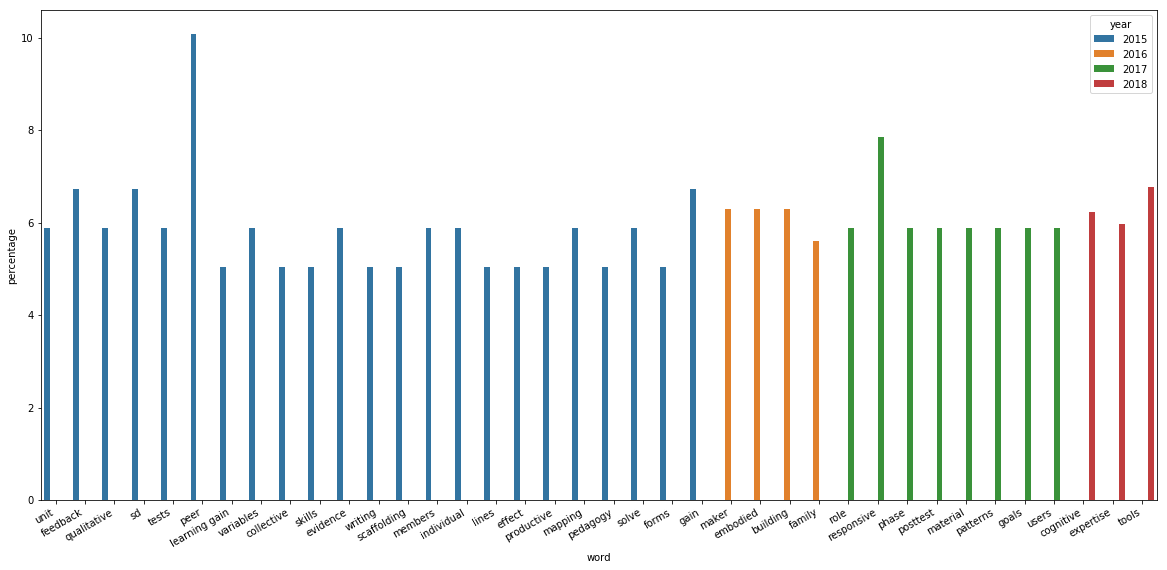

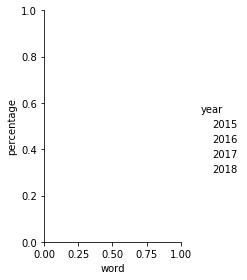

In [57]:
fig,ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)

sns.catplot(x="word", y="percentage",hue="year",
                data=final_df, kind="bar",
                height=4, aspect=.7,ax = ax)

# figure size in inches
fig.autofmt_xdate()
